   # TP53: Effects of Mutation on TP53

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

## TP53 mutation effect on p53 protein abundance

### Set gene and protein(s) of interest--in this case we are only looking at TP53--and then create the "cross" dataframe, which contains all the information we need for plotting this gene

In [6]:
gene = "TP53"
protList = ["TP53"]
cross = CPTAC.compare_mutations(proteomics, gene)
cross = cross[:100]
cross = cross[["Mutation", protList[0]]].dropna(axis=0)

print (cross)

               Mutation      TP53
S001  Missense_Mutation  0.295000
S002           Wildtype  0.277000
S003           Wildtype -0.871000
S004  Missense_Mutation  1.430000
S005           Wildtype -0.343000
S006  Missense_Mutation  3.010000
S007           Wildtype -0.148000
S008  Missense_Mutation  0.441000
S009  Nonsense_Mutation -1.220000
S010           Wildtype -0.082500
S011           Wildtype -0.181000
S012           Wildtype -0.000425
S013    Frame_Shift_Del  0.489000
S014           Wildtype -0.203000
S015  Missense_Mutation  3.310000
S016  Missense_Mutation  2.120000
S017           Wildtype -0.243000
S018           Wildtype -0.000950
S019           Wildtype  0.021300
S020  Missense_Mutation  0.353000
S021           Wildtype -0.403000
S022  Nonsense_Mutation -0.154000
S023           Wildtype -0.056600
S024           Wildtype -0.280000
S025           Wildtype -0.519000
S026           Wildtype -0.455000
S027           Wildtype  0.098000
S028           Wildtype -0.209000
S029          

### Perform a t-test with mutated and non-mutated protein levels

In [5]:
for protein in protList:
    mutated = cross.loc[cross["Mutation"] != "Wildtype"]
    wt = cross.loc[cross["Mutation"] == "Wildtype"]
    ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
    print("Test for " + protein + ": ")
    print(ttest)

Test for TP53: 
Ttest_indResult(statistic=5.87288377126809, pvalue=7.869064487646565e-08)


### We can now plot the data and see that TP53 has a significantly higher abundance when it is mutated (missense mutations specifically)

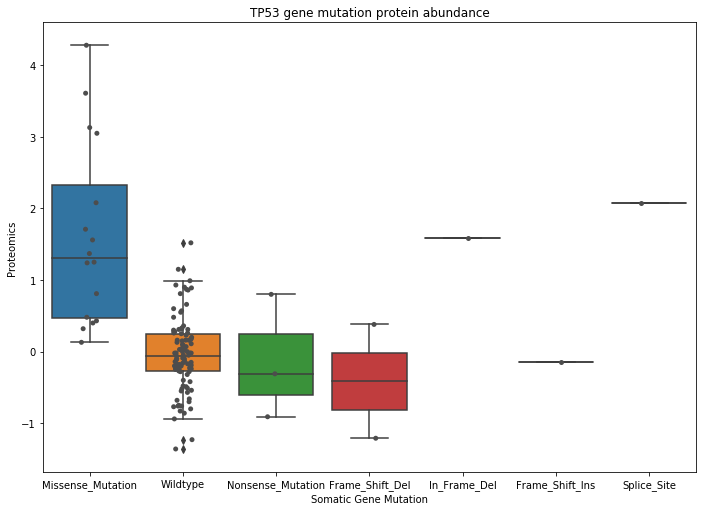

In [7]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=gene, ax = ax)
somatic_boxplot.set_title("TP53 gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

### Let's look at the p-value and plot for missense mutations specifically

In [8]:
mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
wt = cross.loc[cross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print("Test for " + protein + ": ")
print(ttest)

Test for TP53: 
Ttest_indResult(statistic=9.23012818363253, pvalue=1.8452962183494925e-15)


In [9]:
missense_only = cross.loc[(cross["Mutation"] == "Wildtype") | (cross["Mutation"] == "Missense_Mutation")]

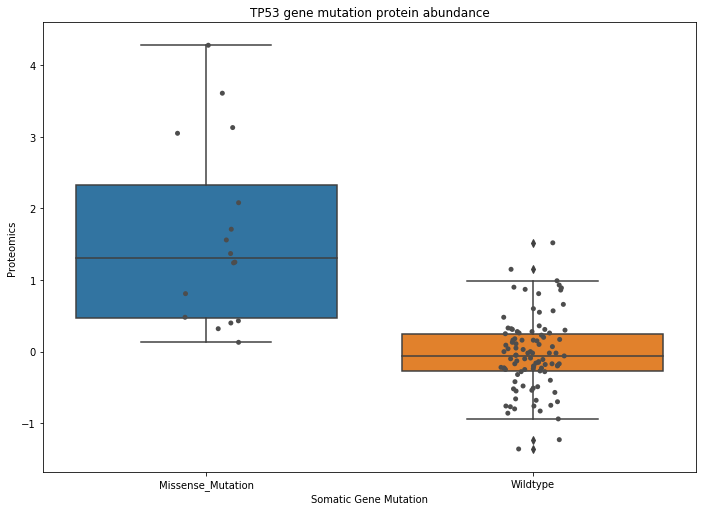

In [10]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=missense_only, x="Mutation",y=gene, ax = ax)
somatic_boxplot.set_title("TP53 gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=missense_only, x="Mutation", y=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

## TP53 mutation effect on p53 phosphorylation levels

### Create a new "phos_cross" dataframe, which contains all phosphorylation sites on p53. We do this using the same CPTAC function as before, except we pass in the phosphoproteomics data

In [11]:
phos_cross = CPTAC.compare_mutations(phos, gene)
phos_cross.head()

,TP53-S315,TP53BP1-S1004,TP53BP1-S1033,TP53BP1-S1072,TP53BP1-S1073,TP53BP1-S1099,TP53BP1-S1106,TP53BP1-S1109,TP53BP1-S1119,TP53BP1-S1221,...,TP53BP2-S704,TP53BP2-S720,TP53BP2-S743,TP53BP2-S789,TP53BP2-T745,TP53I11-S14,TP53RK-T8,Patient_Id,Mutation,Location
S001,NaN,-0.25,NaN,-1.62,-0.34,0.86,0.61,0.50,0.33,0.12,...,0.32,-0.01,-0.65,-0.48,NaN,1.16,NaN,C3L-00006,Missense_Mutation,p.R248W
S002,0.61,-0.11,0.30,0.10,0.21,0.19,0.20,-0.24,-0.14,-0.34,...,NaN,-0.31,0.02,-0.30,0.20,0.84,0.02,NaN,Wildtype,NaN
S003,-0.79,-0.26,0.62,-0.32,-1.48,-0.02,0.15,-0.26,0.26,NaN,...,0.60,NaN,0.19,NaN,-0.06,1.02,-0.31,NaN,Wildtype,NaN
S004,NaN,0.42,-0.34,0.10,0.94,-0.03,-0.06,0.91,0.02,-0.17,...,-2.54,-0.65,-0.14,-1.19,-1.80,0.36,NaN,NaN,Wildtype,NaN
S005,3.78,0.38,0.32,0.26,0.31,0.47,-0.07,0.80,-0.73,-0.50,...,NaN,0.51,0.79,-0.14,NaN,-0.92,0.02,C3L-00098,Missense_Mutation,p.S241C


### We see that *all* sites that contain "TP53" are included, but we're not interested in TP53BP1/2 at this point, so we filter them out

In [12]:
sites = phos_cross.filter(regex='TP53-|Mutation').dropna(axis = 0)
sites.head()

,TP53-S315,Mutation
S002,0.61,Wildtype
S003,-0.79,Wildtype
S005,3.78,Missense_Mutation
S006,-0.63,Wildtype
S008,-0.27,Nonsense_Mutation


### t-test and plot for this site
<b>Note: The wildtype plot comes first in this one because that is what comes first in the dataframe (S001 measurement for phoshporylation was NaN and so it was dropped)</b>

In [13]:
phosphosite = sites.columns[0]
mutated = sites.loc[sites["Mutation"] == "Missense_Mutation"]
wt = sites.loc[sites["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(mutated[phosphosite], wt[phosphosite])
print("Test for " + protein + ": ")
print(ttest)

Test for TP53: 
Ttest_indResult(statistic=7.2747734830732105, pvalue=1.8714703733944433e-10)


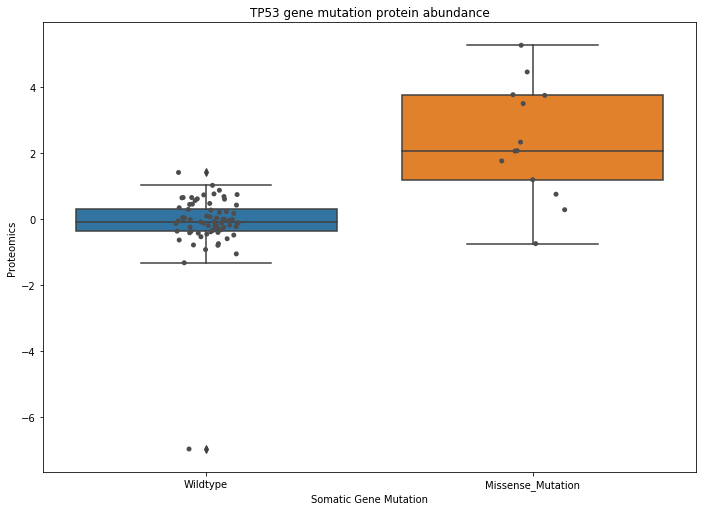

In [14]:
site_missense_only = sites.loc[(sites["Mutation"] == "Wildtype") | (sites["Mutation"] == "Missense_Mutation")]

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=site_missense_only, x="Mutation",y=phosphosite, ax = ax)
somatic_boxplot.set_title("TP53 gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=site_missense_only, x="Mutation", y=phosphosite,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

### We see that this site is generally phosphorylated at higher levels when TP53 is mutated